# fit tempo rilassamento

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [2]:
def load_data_from_file(file_path):
    
    data = np.loadtxt(file_path, delimiter=',', skiprows=9)  # Presuppone un file txt con intestazione
    x = data[:, 0]
    y = data[:, 1]
    return x, y

In [ ]:
file_path = "C:\\Users\\erika\\Downloads\\GruppoA_TimeRelaxation_20250325_152417_Traces.csv"
xT, yV = load_data_from_file(file_path)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


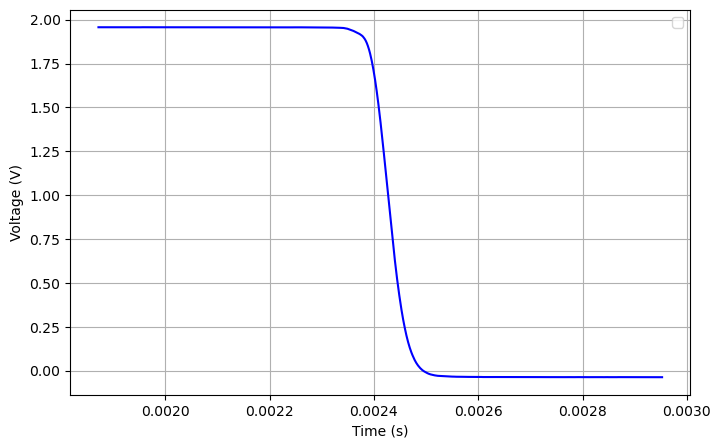

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(xT, yV, marker='', linestyle='-', color='b')
plt.title('')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)

In [ ]:
def sigmoid(x, A, x0, tau, C):
    return A / (1 + np.exp(-(x - x0) / tau)) + C

In [ ]:
par = curve_fit(sigmoid, xT, yV, absolute_sigma=True, p0=[1, 0, 1, 0])

In [ ]:
A_fit, x0_fit, tau_fit, C_fit = par[0]
print(f"A = {A_fit}, x0 = {x0_fit}, tau = {tau_fit}, C = {C_fit}")

A = -1.9938179062914534, x0 = 0.0024290331712952594, tau = 1.594964657205177e-05, C = 1.958409573067492


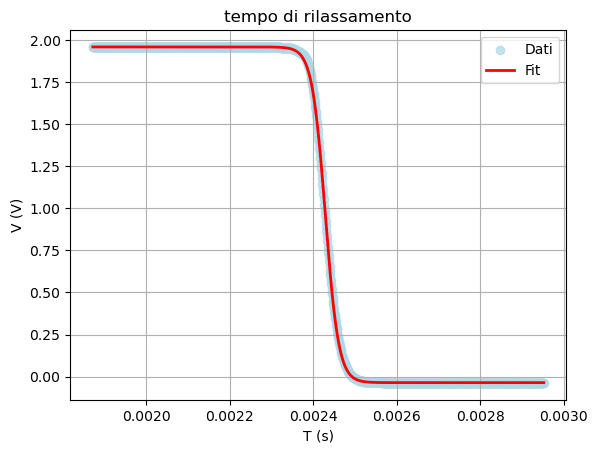

In [ ]:
plt.scatter(xT, yV, label="Dati", color="lightblue", alpha=0.7)
plt.plot(xT, sigmoid(xT, *par[0]), color='r', label="Fit", linewidth=2)
plt.title("tempo di rilassamento")
plt.xlabel("T (s)")
plt.ylabel("V (V)")
plt.legend()
plt.grid(True)
plt.show()